In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Get data from 2018 onwards
csvfile = '/home/sheffieldlab/Desktop/DataScience/Crimes_-_2001_to_Present.csv'
iter_csv = pd.read_csv(csvfile, iterator=True, chunksize=10000)
df = pd.concat([chunk[pd.DatetimeIndex(chunk['Date']).year >= 2018] for chunk in iter_csv])
df.to_csv('/home/sheffieldlab/Desktop/DataScience/Crimes_-_2018_to_Present.csv')

In [19]:
#Load new dataset
csvfile = '/home/sheffieldlab/Desktop/DataScience/Crimes_-_2018_to_Present.csv'
crimedf = pd.read_csv(csvfile, index_col='Date', parse_dates=True, usecols=np.arange(2, 11))

In [93]:
#Add columns for month, year and weekday
crimedf['Year'] = crimedf.index.year
crimedf['Month'] = crimedf.index.month
crimedf['Weekday'] = crimedf.index.weekday

#Plot by year and from january to june
subset = crimedf[crimedf['Month']<7]

### Crime in Chicago decreased during the pandemic

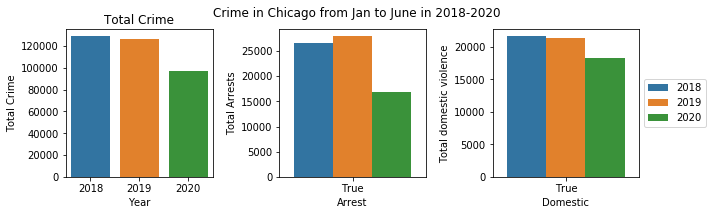

In [59]:
fs, ax = plt.subplots(1, 3, figsize = (10, 3))
sns.countplot(x='Year', data=subset, ax=ax[0])
ax[0].set_title('Total Crime')
sns.countplot(x='Arrest', data=subset[subset['Arrest']==True], hue='Year', ax=ax[1])
sns.countplot(x='Domestic', data=subset[subset['Domestic']==True], hue='Year', ax=ax[2])


ax[0].set_ylabel('Total Crime')
ax[1].set_ylabel('Total Arrests')
ax[2].set_ylabel('Total domestic violence')
ax[1].legend_.remove()
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fs.suptitle('Crime in Chicago from Jan to June in 2018-2020')

fs.tight_layout()

### Overall arrest rate and reported domestic violence decreased when lockdown started

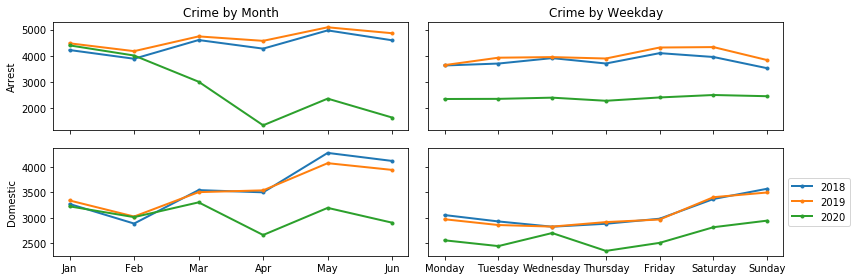

In [107]:
#Plot arrest rate and domestic violence counts by month and weekday
fs, ax = plt.subplots(2, 2, figsize=(12, 4), sharey='row', sharex='col')

for n1, datatype in enumerate(['Month', 'Weekday']):
    ax[0, n1].set_title('Crime by %s' % datatype)
    for n2, crimetype in enumerate(['Arrest', 'Domestic']):
        ax[n2, 0].set_ylabel(crimetype)
        data = subset.groupby(by=['Year', datatype])[
            crimetype].sum().reset_index()
        
        if datatype in 'Month':
            data[datatype] = data[datatype].apply(lambda x: calendar.month_abbr[x])
        else:
            data[datatype] = data[datatype].apply(lambda x: calendar.day_name[x])
            
        for i in [2018, 2019, 2020]:
            thisdata = data[data['Year'] == i]
            ax[n2, n1].plot(thisdata[datatype],
                            thisdata[crimetype], '.-', label=i, linewidth=2)


ax[-1, -1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fs.tight_layout()